<p align="center">
  <img src="https://logodownload.org/wp-content/uploads/2018/04/ufrn-logo.png" width="200" />
</p>

### <center> **Geração de Código em Python e Experimentos com Redes Neurais de Múltiplas Camadas (MLPs).** </center>

**Discentes:** AYSLENON CÂMARA DE MOURA SILVEIRA e VINÍCIUS VENCESLAU VENANCIO DA PENHA

**Docente:** JOSE ALFREDO FERREIRA COSTA

**Disciplina:** **ELE0606** - Tópicos Especiais em Inteligência Artificial

Este documento descreve uma metodologia para o desenvolvimento de código em Python e a realização de experimentos envolvendo Redes Neurais de Múltiplas Camadas (MLPs).

Nesse contexto, a pesquisa focalizará na exploração da base de dados da **Yale Face Database**, direcionando-se para a identificação de expressões faciais e características específicas em retratos.

Outrossim, aborda-se no trabalho a criação completa de algoritmos a partir do zero, incluindo o desenvolvimento integral do código para backpropagation ou outros algoritmos. Isso engloba desde a configuração inicial até a aplicação total do algoritmo.

Ademais, o estudo contempla a utilização de bibliotecas consolidadas, como scikit-learn, TensorFlow e Keras, para implementações que se baseiam em métodos já existentes, explorando suas funcionalidades e adaptando-as ao contexto específico do projeto.

O foco principal consiste em realizar uma análise comparativa entre essas abordagens, levando em consideração variáveis como tempo de execução, complexidade na implementação e os resultados alcançados.

*   **29/11** - **fase 1** – mostrar que conseguiu abrir a base, fez pré-processamentos, estudos, organização inicial do trabalho e a estratégia para conclusão.
*   **6/12** – **fase 2** – Relatório e apresentação no grupo, demonstrando execução do código e resultados.

##**Referências:**

[1] **yale_face_database using cnn**. Disponível em: <https://www.kaggle.com/code/rayenbenfathallah/yale-face-database-using-cnn>. Acesso em: 28 de novembro de 2023.

[2] OPENAI. **ChatGPT**. Disponível em: <https://chat.openai.com/auth/login>.

### **1. Preparação do Ambiente e Dados:**

Realização da leitura e carregamento do arquivo .zip, o qual detém a base de dados que será analisada no projeto.

In [ ]:
import zipfile
import os

# Caminho para o arquivo ZIP upado no Google Colab
caminho_arquivo_zip = '/content/Yale_Face_Database.zip'

# Caminho para o diretório de destino que irá conter os arquivos extraídos
caminho_destino = './Yale_Face_Extraido'

# Certifique-se de que o diretório de destino exista ou crie-o
os.makedirs(caminho_destino, exist_ok=True)

# Extrair o arquivo ZIP
with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall(caminho_destino)

print(f'Arquivo ZIP extraído em: {caminho_destino}')

Arquivo ZIP extraído em: ./Yale_Face_Extraido


Listar os arquivos presentes no diretório de extração (caminho_extracao) após a extração do arquivo ZIP.

In [ ]:
import os

# Listar arquivos no diretório de extração
os.listdir(caminho_destino)

['subject06.surprised',
 'subject04.wink',
 'subject03.noglasses',
 'subject07.sad',
 'subject14.happy',
 'subject09.sad',
 'subject04.noglasses',
 'subject08.normal',
 'subject09.surprised',
 'subject05.surprised',
 'subject12.rightlight',
 'subject03.rightlight',
 'subject08.glasses',
 'subject11.wink',
 'subject09.sleepy',
 'subject05.sleepy',
 'subject07.sleepy',
 'subject01.noglasses',
 'subject14.centerlight',
 'subject09.noglasses',
 'subject15.wink',
 'subject08.rightlight',
 'subject10.wink',
 'subject04.glasses',
 'subject15.noglasses',
 'subject15.normal',
 'subject11.happy',
 'subject15.sad',
 'subject08.sleepy',
 'subject10.rightlight',
 'subject05.wink',
 'subject09.glasses',
 'subject01.sad',
 'subject05.sad',
 'subject02.leftlight',
 'subject08.sad',
 'subject03.centerlight',
 'subject06.rightlight',
 'subject05.centerlight',
 'subject12.centerlight',
 'subject10.happy',
 'subject10.noglasses',
 'subject06.happy',
 'subject10.sad',
 'subject10.normal',
 'subject06.leftl

Agora, a ideia é produzir um código que permita a visualização deste material.

Portanto, percebe-se que é preciso converter todos os arquivos da base de dados para **.jpg**.

Nesse viés, será aproveitado a pasta presente no banco de dados, denominada '**data**', a qual detém as informações desejadas que serão convertidas.

In [ ]:
import os
from PIL import Image

def conversao():
    # Caminhos para os diretórios de entrada e saída
    caminho_dados = './Yale_Face_Extraido/data'
    caminho_dados_convertidos = './Pre_Processo'

    # Verifica se o diretório de saída existe; se não, cria-o
    if not os.path.isdir(caminho_dados_convertidos):
        os.mkdir(caminho_dados_convertidos)

        # Itera pelos arquivos no diretório de entrada
        for nome_do_arquivo in os.listdir(caminho_dados):
            # Verifica se o arquivo não é do tipo gif, txt ou DS_Store
            if not 'gif' in nome_do_arquivo and not 'txt' in nome_do_arquivo and not 'DS_Store' in nome_do_arquivo:
                # Abre a imagem
                imagem = Image.open(caminho_dados + '/' + nome_do_arquivo)
                # Obtém o número do sujeito da imagem
                nome_da_classe = nome_do_arquivo.split('.')[1]
                # Define o caminho para a imagem convertida
                caminho_da_imagem = caminho_dados_convertidos + '/' + nome_da_classe + '/' + nome_do_arquivo + '.jpg'

                # Verifica se o diretório para o sujeito existe; se não, cria-o
                if not os.path.isdir(caminho_dados_convertidos + '/' + nome_da_classe):
                    os.mkdir(caminho_dados_convertidos + '/' + nome_da_classe)

                # Verifica se o arquivo convertido não existe; se não, o salva
                if not os.path.isfile(caminho_da_imagem):
                    imagem.save(caminho_da_imagem)
    else:
        print("Procedimento Concluído!")

Execução da função '**conversao**' que realiza a modificação no tipo dos arquivos pertencentes a base de dados.

In [ ]:
conversao()

Procedimento Concluído!


Por fim, o código seguinte produz a visualização de uma amostra da base de dados em estudo, sendo a porção escolhida, referente às imagens das **15 pessoas piscando**, ou seja, os arquivos associados à classe **'wink'**.

Vale ressaltar que, a interpretação feita pelos discente foi estabelecer os exemplos de expressões facias como as classes do sistema, sendo assim, **11 padrões de classe**.

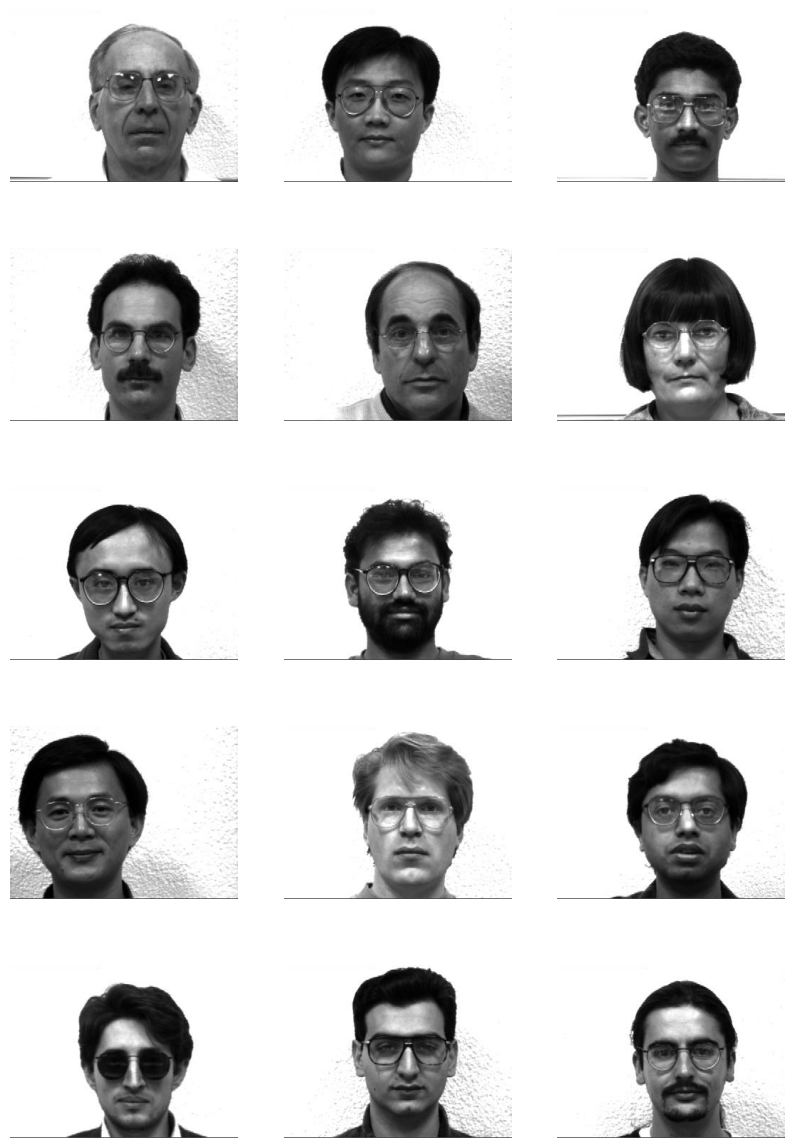

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2 as cv

# Caminho para a pasta que contém as imagens
caminho_pasta = './Pre_Processo/glasses'

# Obter a lista de arquivos na pasta
arquivos = os.listdir(caminho_pasta)

# Configuração da plotagem das amostras desejadas
num_linhas = 5
num_colunas = 3
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 15))

# Iterar sobre os arquivos e exibir as imagens
for i, arquivo in enumerate(arquivos):
    caminho_imagem = os.path.join(caminho_pasta, arquivo)
    img = cv.imread(caminho_imagem)
    axs[i // num_colunas, i % num_colunas].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axs[i // num_colunas, i % num_colunas].axis('off')  # Desativar os eixos

plt.show()